# Research question: How does choice of activation function affect the performance of a neural network?
This research question will be examining the same neural net created in the Fusion data neural net approach notebook, but instead of comparing it to the non-neural net approach, we'll be examining how different activation functions will affect the efficiency and performance of the neural net. 

## Libraries
Below, as always, are all the libraries used in this notebook.

In [30]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler 
import kagglehub
from timeit import default_timer as timer

## Dataset initialization and editing
As with the prior two notebooks, I have imported the fusion data into the notebook and edited it in the following ways:
- Removed the 'Unnamed:0' column as it has no bearing on the data and is just an index.
- Used a LabelEncoder to change the categorical columns into float values that represent each category. 
- Used a random under sampler to balance the distribution of classes in Ignition so that the models don't overfit towards predicting one over the other.

In [21]:
path = kagglehub.dataset_download("adebusayoadewunmi/nuclearfusion-data") + '/fusion_experiment.csv'
print("Path to dataset files:", path)
fusion = pd.read_csv(path)
fusion = fusion.drop(['Unnamed: 0'], axis=1)
le = LabelEncoder()
fusion['Magnetic Field Configuration'] = le.fit_transform(fusion['Magnetic Field Configuration']).astype('float64')
fusion['Target Composition'] = le.fit_transform(fusion['Target Composition']).astype('float64')
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(fusion)
fusion = pd.DataFrame(scaled_data, columns=fusion.columns)
rus = RandomUnderSampler(sampling_strategy = 'majority',
                                         random_state=42)
X, y = fusion.drop(['Ignition'], axis=1), fusion['Ignition']
X_rus, y_rus = rus.fit_resample(X,y)

Path to dataset files: /home/idies/.cache/kagglehub/datasets/adebusayoadewunmi/nuclearfusion-data/versions/1/fusion_experiment.csv


/home/idies/mambaforge/envs/py39/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/home/idies/mambaforge/envs/py39/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.3)

## Models
For an MLP classifier, there are four activation types:
 - Identity: no-op activation, returns f(x)=x
 - Logistic: the logistic sigmoid function, returns f(x) = 1/(1-exp(x))
 - tanh: Hyperbolic tan function, returns f(x) = tanh(x)
 - relu: Rectified Linear Unit fuction, returns f(x) = max(0,x)

The box below is initializing four MLPClassifiers for each activation function and then fitting each one to X_train and y_train, as is normally done for these modules. I have used the same module from my neural net notebook, minus the fourth layer to save some time (otherwise this would take about four hours longer to run).

In [23]:
start = timer()
apple = MLPClassifier(hidden_layer_sizes=(64, 32, 16),
                      activation='identity',
                      max_iter=1000, random_state = 42)
end = timer()
print(f'Time elapsed initialising apple: {end-start} seconds')


start = timer()
pie = MLPClassifier(hidden_layer_sizes=(64, 32, 16),
                    activation='logistic',
                    max_iter=1000, random_state = 42)
end = timer()
print(f'Time elapsed initialising pie: {end-start} seconds')


start = timer()
dash = MLPClassifier(hidden_layer_sizes=(64, 32, 16),
                     activation='tanh',
                     max_iter=1000, random_state = 42)
end = timer()
print(f'Time elapsed initialising dash: {end-start} seconds')


start = timer()
twilight = MLPClassifier(hidden_layer_sizes=(64, 32, 16),
                         activation='relu',
                         max_iter=1000, random_state = 42)
end = timer()
print(f'Time elapsed initialising twilight: {end-start} seconds')


start = timer()
apple.fit(X_train, y_train)
end = timer()
print(f'Time elapsed training apple: {end-start} seconds')

start = timer()
pie.fit(X_train, y_train)
end = timer()
print(f'Time elapsed training pie: {end-start} seconds')

start = timer()
dash.fit(X_train, y_train)
end = timer()
print(f'Time elapsed training dash: {end-start} seconds')

start = timer()
twilight.fit(X_train, y_train)
end = timer()
print(f'Time elapsed training twilight: {end-start} seconds')

Time elapsed initialising apple: 0.0008864402770996094 seconds
Time elapsed initialising pie: 0.0007392615079879761 seconds
Time elapsed initialising dash: 0.0005746223032474518 seconds
Time elapsed initialising twilight: 0.0005208980292081833 seconds
Time elapsed training apple: 178.31194374524057 seconds
Time elapsed training pie: 176.69087435491383 seconds
Time elapsed training dash: 10352.181443847716 seconds
Time elapsed training twilight: 3412.323444960639 seconds


## Model evaluation
### Accuracy scores
The first part of this step is comparing each model and observing which one of them has the best accuracy scores. We'll also be looking at the differences between the predictions made for each category (Magnetic Field Configuration and Target Composition) and seeing what we can glean from that.

In [24]:
apple_pred = apple.predict(X_train)
apple_train_accuracy = apple.score(X_train, y_train)
apple_test_accuracy = apple.score(X_test, y_test)
apple_mse = mean_squared_error(y_train, apple_pred)

pie_pred = pie.predict(X_train)
pie_train_accuracy = pie.score(X_train, y_train)
pie_test_accuracy = pie.score(X_test, y_test)
pie_mse = mean_squared_error(y_train, pie_pred)

dash_pred = dash.predict(X_train)
dash_train_accuracy = dash.score(X_train, y_train)
dash_test_accuracy = dash.score(X_test, y_test)
dash_mse = mean_squared_error(y_train, dash_pred)

twilight_pred = twilight.predict(X_train)
twilight_train_accuracy = twilight.score(X_train, y_train)
twilight_test_accuracy = twilight.score(X_test, y_test)
twilight_mse = mean_squared_error(y_train, twilight_pred)

print('Training accuracy scores:')
print(f'Identity {apple_train_accuracy}')
print(f'Logistic: {pie_train_accuracy}')
print(f'tanh: {dash_train_accuracy}')
print(f'relu: {twilight_train_accuracy}')
print('\n')
print('Testing accuracy scores:')
print(f'Identity: {apple_test_accuracy}')
print(f'Logistic: {pie_test_accuracy}')
print(f'tanh: {dash_test_accuracy}')
print(f'relu: {twilight_test_accuracy}')
print('\n')
print(f'Mean Squared Errors:')
print(f'Identity: {apple_mse}')
print(f'Logistic: {pie_mse}')
print(f'tanh: {dash_mse}')
print(f'relu: {twilight_mse}')

Training accuracy scores:
Identity 0.5070242050308496
Logistic: 0.5035121025154248
tanh: 0.7162553393450404
relu: 0.6641670621737067


Testing accuracy scores:
Identity: 0.501328903654485
Logistic: 0.5003322259136213
tanh: 0.5011627906976744
relu: 0.4983942414174972


Mean Squared Errors:
Identity: 0.49297579496915045
Logistic: 0.4964878974845752
tanh: 0.2837446606549597
relu: 0.3358329378262933


Just going off of the accuracy scores, we see that the most accurate (for both the training and testing) is the "dash" model with tanh activation, with the order of next best models being relu, identity and logistic.

### Classification reports

In [27]:
apple_pred = apple.predict(X_train)
apple_report = classification_report(y_train, apple_pred)
print("Apple classification report:\n", apple_report)

pie_pred = pie.predict(X_train)
pie_report = classification_report(y_train, pie_pred)
print("Pie classification report:\n", pie_report)

dash_pred = dash.predict(X_train)
dash_report = classification_report(y_train, dash_pred)
print("Dash classification report:\n", dash_report)

twilight_pred = twilight.predict(X_train)
twilight_report = classification_report(y_train, twilight_pred)
print("Twilight classification report:\n", twilight_report)

Apple classification report:
               precision    recall  f1-score   support

         0.0       0.50      0.73      0.60     21070
         1.0       0.51      0.29      0.37     21070

    accuracy                           0.51     42140
   macro avg       0.51      0.51      0.48     42140
weighted avg       0.51      0.51      0.48     42140

Pie classification report:
               precision    recall  f1-score   support

         0.0       0.51      0.12      0.20     21070
         1.0       0.50      0.88      0.64     21070

    accuracy                           0.50     42140
   macro avg       0.51      0.50      0.42     42140
weighted avg       0.51      0.50      0.42     42140

Dash classification report:
               precision    recall  f1-score   support

         0.0       0.72      0.71      0.72     21070
         1.0       0.71      0.72      0.72     21070

    accuracy                           0.72     42140
   macro avg       0.72      0.72      0.

According to these classification reports, the Dash model (tanh activation) is the most successful in predicting ignition; let's get a closer look at how the data is being split by generating confusion matrices for each model.

### Confusion Matrices

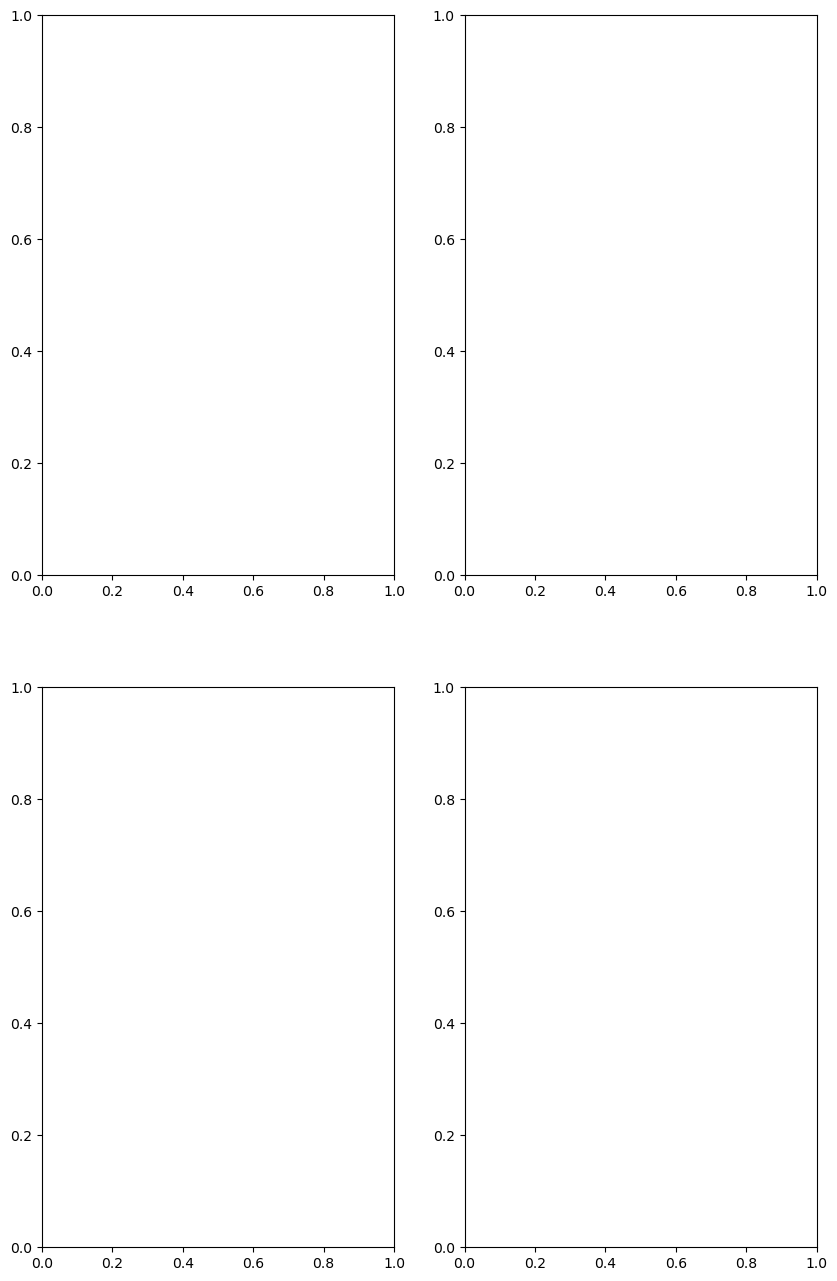

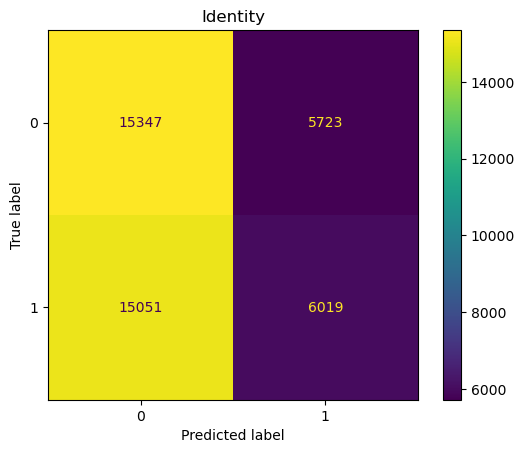

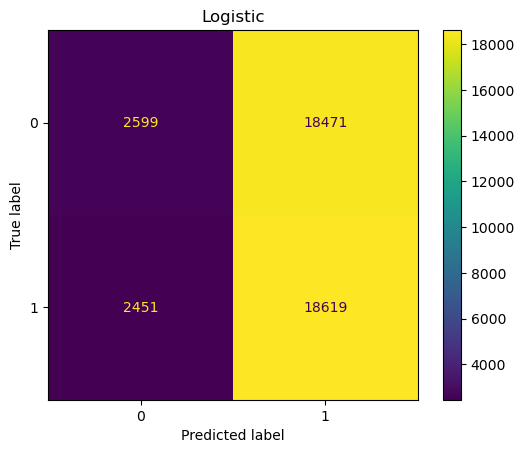

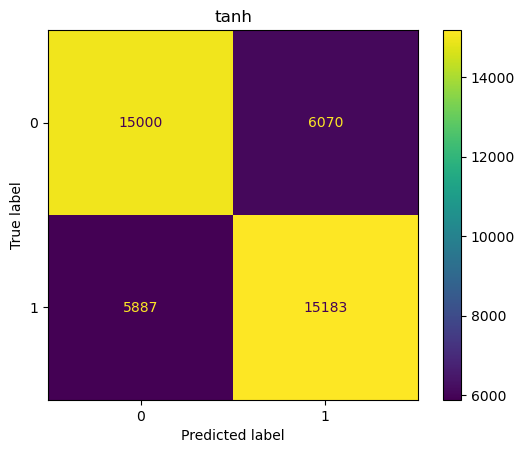

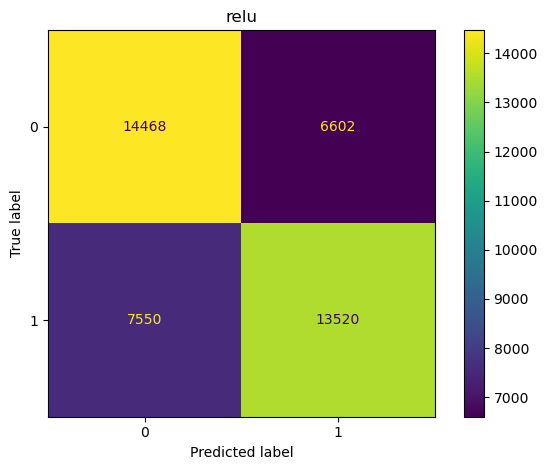

In [32]:
cm_apple = confusion_matrix(y_train, apple_pred)
cm_pie = confusion_matrix(y_train, pie_pred)
cm_dash = confusion_matrix(y_train, dash_pred)
cm_twilight = confusion_matrix(y_train, twilight_pred)
cms = [cm_apple, cm_pie, cm_dash, cm_twilight]
labels = ['Identity', 'Logistic', 'tanh', 'relu']
i=0


f, axes = plt.subplots(2, 2, figsize=(10, 16))
for array, axes in zip(cms, axes.flatten()):
    ConfusionMatrixDisplay(confusion_matrix=array, display_labels=['0','1']).plot()
    plt.title(labels[i])
    i+=1
plt.tight_layout()  
plt.show()

There are three key points that I'll go through here:

1) Identity and Logistic have mirrored prediction trends, with Identity predicting a majority of zeroes and Logistic predicting a majority of ones. This does make sense, as the Logistic function uses f(x)=1/(1-e^x) whereas Identity uses f(x)=x, so Logistic being the inverse of Identity does track.

2) tanh has a very close split between both correct and incorrect of zeroes and ones; additionally true positive predictions of zeroes number at 15000 exactly, which may well be a coincidence or could be indicative of some kind of bias. 

3) relu has a similar prediction trend to that of the tanh model, but shows more bias towards predicting zeroes still. Simultaneously, however, the model *also* makes more *incorrect* predictions of ones; I'm uncertain of what could be causing this trend to occur.

### Time elapsed by models
The final thing I'd like to discuss is the time taken for each model to complete fitting; this may or may not be the most important detail depending on what system you're using to run all of this code, but for those with lower computational power, it can make all the difference in the world when deciding what model to use. 
Below are the times taken for each model to finish training: 

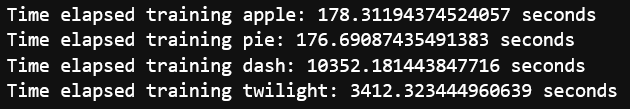

Right off the bat, we see that the Identity and Logistic models took the least amount of time at under three minutes - this makes sense given they're the least complex activation functions - whereas the tanh and relu models each took a lot longer. 
Converting from seconds to hours, we find that the tanh model took 2.85 hours to complete, whereas the relu model took 0.94 hours. This does somewhat take away from dash's overall quality, as having to wait nearly 3 hours for a single function to complete is quite prohibitive for many users.

## Closing remarks

It may be tempting to say that the tanh function is the best of the four overall due to its higher precision, recall, and F1 scores, but I posit that the relu activation function worked better for one main reason: the runtime. The tanh model taking about 2 hours longer to run than the relu model for only a 0.06 increase in F1 scores across the board makes its use difficult and hard to justify for many who will want results sooner rather than later, and the slight bias present in the relu model is a perfectly reasonable trade-off for this. As such, it is my conclusion that the most effective model out of the four is the relu activation function.